# Draft: Data Story Project 

## Analyzing life expectancy trends and country-specific risk factors in global mortality

Student names and student numbers of the team:

- Hanna Ismaël - 14149389
- Kiara Arvelo - 13562932
- Samar Jamshaid - 14076926
- Milan Hovenier - 13823035

# Introduction
In this data story, we embark on a captivating journey to unravel the intricate relationship between life expectancy and country-specific risk factors in global mortality. By delving into two comprehensive datasets - the WHO life expectancy dataset and the worldwide deaths by risk factors dataset - we aim to shed light on the correlations and gain profound insights into the factors that shape mortality rates across the globe. Our exploration focuses on the impact of various risk factors on life expectancy in six diverse countries: Belgium, Finland, France, Haiti, Sierra Leone, and Malawi.

Our data story revolves around two key perspectives, each presenting a distinct lens through which we examine the intriguing dynamics between risk factors and life expectancy. The first perspective delves into the influential risk factor of "Low birth weight for gestation," where we aim to investigate if there exists a strong association with variations in life expectancy across the selected countries. By closely analyzing the relationship between low birth weight and life expectancy, we aim to unravel its impact and explore how it intertwines with other risk factors.

The second perspective challenges the assumption that all risk factors significantly affect life expectancy across the chosen countries. We examine the hypothesis that "None of the risk factors have a significant effect on life expectancy across Belgium, Finland, France, Haiti, Sierra Leone, and Malawi." By critically analyzing multiple risk factors including household air pollution from solid fuels, alcohol use, smoking, drug use, high fasting plasma glucose, iron deficiency, vitamin A deficiency, and high systolic blood pressure, we aim to determine the extent of their influence on life expectancy within these specific contexts.

Throughout our data story, we will employ a combination of exploratory data analysis techniques and compelling visualizations to elucidate the intricate relationship between risk factors and life expectancy.

# Dataset and Preprocessing
The WHO Life Expectancy dataset serves as a valuable resource for understanding global life expectancy trends and the underlying factors impacting mortality rates. This comprehensive dataset encompasses information from 193 countries, spanning a timeframe of 2000 to 2015. By including variables such as adult mortality, BMI, income composition of resources, and population, the dataset provides key insights into the factors that contribute to variations in life expectancy.

On the other hand, the Worldwide Deaths by Risk Factors dataset offers a wealth of information regarding annual death statistics categorized by risk factors and countries. Each entry in the dataset corresponds to a specific country and year, accompanied by the total number of deaths attributed to different risk factors. Obtained from the WHO website, this dataset allows us to explore the impacts of various risk factors on mortality rates across different regions of the world.

To prepare these datasets for analysis, we performed several data preprocessing steps. Given the large size of the datasets, we focused our analysis on the top three countries with the highest life expectancy and the three countries with the lowest life expectancy. This approach enables us to gain insights into the factors influencing mortality rates at both ends of the spectrum.

In [1]:
# Import packages
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_life_expectancy = pd.read_csv("Life Expectancy Data.csv")
df_deaths = pd.read_csv("number-of-deaths-by-risk-factor.csv")

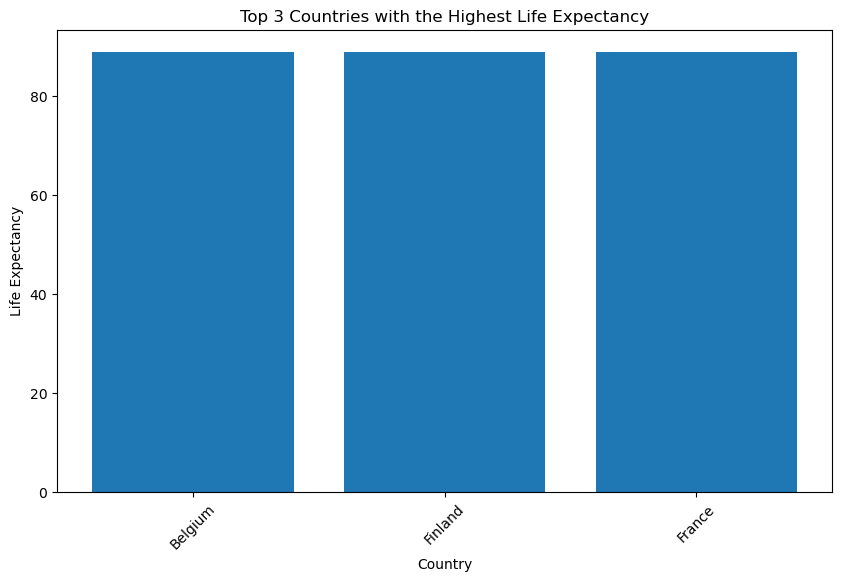

In [3]:
# Top 3 Countries with the Highest Life Expectancy
top_10_countries = df_life_expectancy.nlargest(3, 'Life expectancy ')

plt.figure(figsize=(10, 6))
plt.bar(top_10_countries['Country'], top_10_countries['Life expectancy '])
plt.xlabel('Country')
plt.ylabel('Life Expectancy')
plt.title('Top 3 Countries with the Highest Life Expectancy')
plt.xticks(rotation=45)
plt.show()

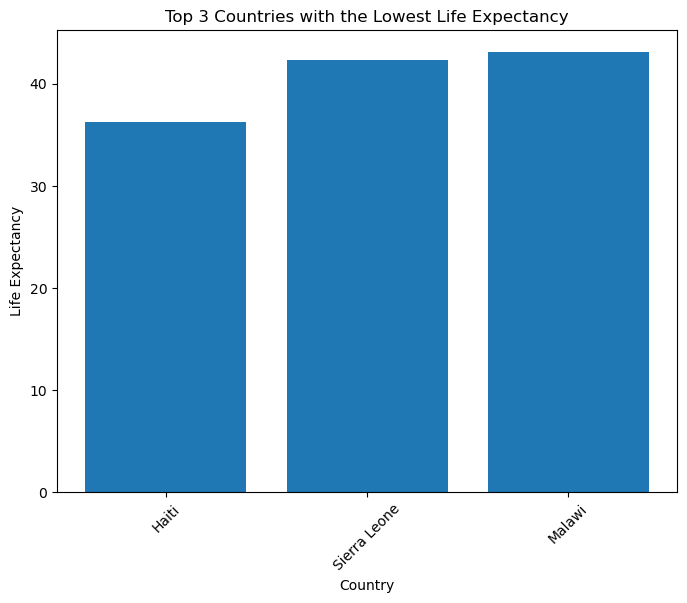

In [4]:
# Top 3 Countries with the Lowest Life Expectancy
top_3_countries = df_life_expectancy.nsmallest(6, 'Life expectancy ')

plt.figure(figsize=(8, 6))
plt.bar(top_3_countries['Country'], top_3_countries['Life expectancy '])
plt.xlabel('Country')
plt.ylabel('Life Expectancy')
plt.title('Top 3 Countries with the Lowest Life Expectancy')
plt.xticks(rotation=45)
plt.show()

In [5]:
countries_to_keep = ['Belgium', 'Finland', 'France','Haiti', 'Sierra Leone', 'Malawi']
filtered_df = df_life_expectancy[df_life_expectancy['Country'].isin(countries_to_keep)]
new_df_life_expectancy = filtered_df

new_df_life_expectancy.head(3)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
240,Belgium,2015,Developed,81.1,74.0,0,NaN,0.000000,98.0,47,...,99.0,NaN,99.0,0.1,4356.87500,11274196.0,1.0,1.0,0.895,16.6
241,Belgium,2014,Developed,89.0,76.0,0,12.60,7163.348923,98.0,70,...,99.0,1.59,99.0,0.1,47439.39684,112957.0,1.0,1.0,0.890,16.3
242,Belgium,2013,Developed,87.0,77.0,0,11.77,702.359357,98.0,39,...,99.0,1.57,99.0,0.1,4651.38647,11182817.0,1.0,0.9,0.889,16.3


In [6]:
countries_to_keep = ['Belgium', 'Finland', 'France','Haiti', 'Sierra Leone', 'Malawi']
filtered_df2 = df_deaths[df_deaths['Entity'].isin(countries_to_keep)]
new_df_deaths = filtered_df2

new_df_deaths.head(3)

,Entity,Year,Unsafe water source,Unsafe sanitation,No access to handwashing facility,Household air pollution from solid fuels,Non-exclusive breastfeeding,Discontinued breastfeeding,Child wasting,Child stunting,...,High systolic blood pressure,Smoking,Iron deficiency,Vitamin A deficiency,Low bone mineral density,Air pollution,Outdoor air pollution,Diet high in sodium,Diet low in whole grains,Diet low in nuts and seeds
532,Belgium,1990,5.428403,4.541489,20.805044,110.543845,3.364051,0.336438,35.105651,0.987683,...,22374.01534,24880.24716,3.367132,2.096979,608.217499,6489.246707,6479.55,3033.982228,6302.601872,4742.909996
533,Belgium,1991,5.537522,4.455156,20.818661,101.166103,3.470106,0.351307,38.578118,0.986998,...,21696.47018,24701.57680,3.417325,2.118033,601.408939,6348.083821,6349.30,2952.250216,6048.774394,4534.641516
534,Belgium,1992,5.577656,4.509885,21.673335,94.479048,3.303676,0.341810,47.894190,0.938167,...,21402.94164,24725.94219,2.710569,2.034301,607.162053,6307.603984,6318.05,2902.954730,5901.728684,4399.109963


Furthermore, from the Worldwide Deaths by Risk Factors dataset, we specifically selected risk factors that exhibit a correlation with low birth weight for gestation. By focusing on these relevant risk factors, we can delve deeper into their association with variations in life expectancy and gain a better understanding of their impact on global mortality rates.

In [7]:
# Risk factors 
desired_columns = ['Entity','Year','Low birth weight for gestation','Household air pollution from solid fuels','Alcohol use','Smoking','Drug use', 'High fasting plasma glucose','High systolic blood pressure', 'Iron deficiency', 'Vitamin A deficiency']
new_df =  new_df_deaths[desired_columns].copy()

risk_factors = new_df
risk_factors.head(3)

,Entity,Year,Low birth weight for gestation,Household air pollution from solid fuels,Alcohol use,Smoking,Drug use,High fasting plasma glucose,High systolic blood pressure,Iron deficiency,Vitamin A deficiency
532,Belgium,1990,323.141027,110.543845,3570.717347,24880.24716,331.308006,15977.86231,22374.01534,3.367132,2.096979
533,Belgium,1991,317.371940,101.166103,3554.248019,24701.57680,352.460266,15585.46116,21696.47018,3.417325,2.118033
534,Belgium,1992,307.309729,94.479048,3553.678352,24725.94219,371.237663,15504.58207,21402.94164,2.710569,2.034301


These preprocessing steps ensure that we are working with a more manageable and targeted dataset, enabling us to uncover meaningful relationships and draw insightful conclusions regarding the relationship between risk factors and life expectancy.

# Visualizations

In [8]:
df_merged = pd.merge(new_df_life_expectancy, new_df_deaths, on='Year')
df_merged.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,High systolic blood pressure,Smoking,Iron deficiency,Vitamin A deficiency,Low bone mineral density,Air pollution,Outdoor air pollution,Diet high in sodium,Diet low in whole grains,Diet low in nuts and seeds
0,Belgium,2015,Developed,81.1,74.0,0,NaN,0.0,98.0,47,...,17304.76620,20938.662090,1.634444,1.489096,1087.914532,5103.342535,5181.86,2365.702982,4140.712114,2756.704267
1,Belgium,2015,Developed,81.1,74.0,0,NaN,0.0,98.0,47,...,11418.82288,5270.094218,0.395328,0.112049,569.242783,1099.694924,1090.12,1778.547285,2696.390606,2396.785607
2,Belgium,2015,Developed,81.1,74.0,0,NaN,0.0,98.0,47,...,77411.20647,80348.780880,6.966090,0.594266,6358.178573,19413.809800,19589.38,13584.515750,20578.037850,13130.127040
3,Belgium,2015,Developed,81.1,74.0,0,NaN,0.0,98.0,47,...,12826.05417,3857.263330,371.909069,1059.257265,234.944234,7774.440178,1090.16,749.368999,4471.976881,2725.535126
4,Belgium,2015,Developed,81.1,74.0,0,NaN,0.0,98.0,47,...,10803.04462,3797.624452,288.132388,1297.980890,410.607485,8763.628966,1206.61,1259.963884,1928.795967,1844.868207


## Visualization 1: Life Expectancy Trends Over Time
This line chart illustrates the trend of life expectancy over the years 2000 to 2015 for different countries. The x-axis represents the years, while the y-axis indicates life expectancy in years. The chart highlights the overall patterns and variations in life expectancy across different countries over the analyzed period.

Life expectancy has generally increased worldwide over the past decades, indicating improvements in healthcare and living conditions. Furthermore, Significant disparities exist between countries, with some nations experiencing higher life expectancies compared to others.

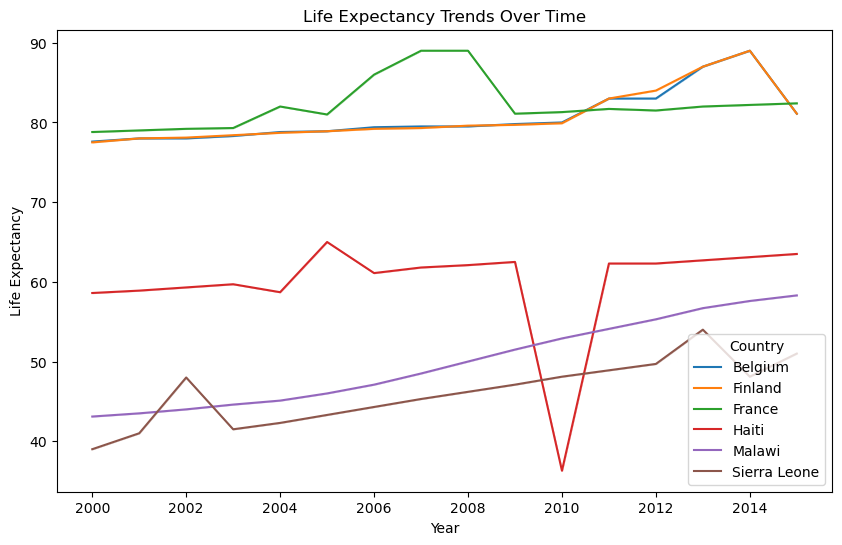

In [9]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_merged, x='Year', y='Life expectancy ', hue='Country')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy Trends Over Time')
plt.show()

## Visualization 2: Comparison of Risk Factors by Country
The bar chart compares the prevalence of different risk factors across the selected countries: Belgium, Finland, France, Haiti, Sierra Leone, and Malawi. The risk factors considered in this analysis are Low birth weight for gestation, Household air pollution from solid fuels, Alcohol use, Smoking, Drug use, High fasting plasma glucose, Iron deficiency, and Vitamin A deficiency.

Among the countries examined, Belgium, Finland, and France, which are developed nations, have no reported deaths associated with Low birth weight for gestation. In contrast, the developing countries of Haiti, Sierra Leone, and Malawi display a significant number of deaths linked to this risk factor. This discrepancy suggests that Low birth weight for gestation may exert a stronger influence on life expectancy in developing countries, potentially due to factors like inadequate healthcare resources or socio-economic disparities.

Additionally, the chart reveals that France exhibits the highest overall mortality rate among the selected countries, with High systolic blood pressure being the most prevalent risk factor. This finding highlights the potential impact of high blood pressure on life expectancy.

The data presented in the graph supports this perspective by demonstrating the presence of significant mortality rates associated with Low birth weight for gestation in developing countries, while no deaths are recorded in developed countries. This observation suggests an association between Low birth weight for gestation and variations in life expectancy, particularly in developing nations.

The data depicted in the graph highlights an interesting observation regarding France. Despite reporting the highest number of deaths among the selected countries, primarily attributed to High systolic blood pressure and smoking, there is no clear indication of a negative impact on the overall life expectancy of the country. This finding challenges the notion that these risk factors have a significant effect on life expectancy within the context of France.

<Figure size 1000x600 with 0 Axes>

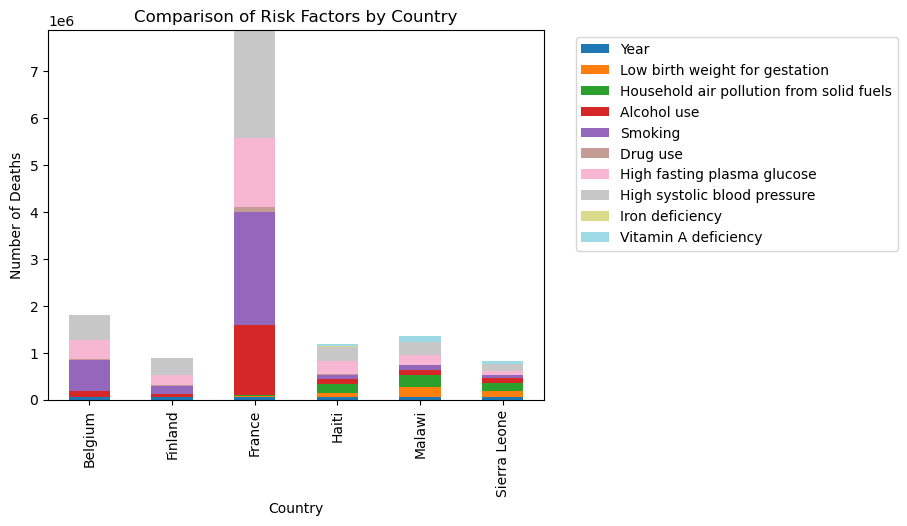

In [10]:
df_risk_factors_by_country = new_df.groupby('Entity').sum()
plt.figure(figsize=(10, 6))
df_risk_factors_by_country.plot(kind='bar', stacked=True, colormap='tab20')
plt.xlabel('Country')
plt.ylabel('Number of Deaths')
plt.title('Comparison of Risk Factors by Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Visualization 3: Top Risk Factors Contributing to Low Birth Weight for Gestation 

This chart shows the top eight risk factors contributing to low birth weight for gestation. According to the pie chart, the highest risk factors are high systolic blood pressure and smoking. The lowest risk are iron deficiency and drug use.

The highest risk factors contribute to low birth weight and its associated difficulties by having a major negative impact on mother health and fetal development. Visualizing the high prevalence of these risk variables can help to support the case that they have a significant impact on variations in life expectancy.

Low birth weight is a recognized risk factor for several diseases and can have long-term effects on a person's health. The pie chart, together with appropriate health information, can demonstrate the long-term impact of low birth weight on life expectancy.

The case that low birth weight for gestation plays a substantial role in determining life expectancy can be supported by visualizing the differences in risk factor percentages among Belgium, Finland, France, Haiti, Sierra Leone, and Malawi.

It is important to understand that a variety of factors other than birth weight alone affect life expectancy, even if the pie chart illustrates the main risk factors for low birth weight for gestation.
Life expectancy may also be significantly influenced by elements like socioeconomic level, education, healthcare accessibility, and environmental circumstances.

Although certain risk factors contribute to low birth weight for gestation, establishing a direct causal relationship between these risk factors and life expectancy can be complex.
The argument can be made that while risk factors influence birth outcomes, their impact on life expectancy might be indirect or overshadowed by other determinants.

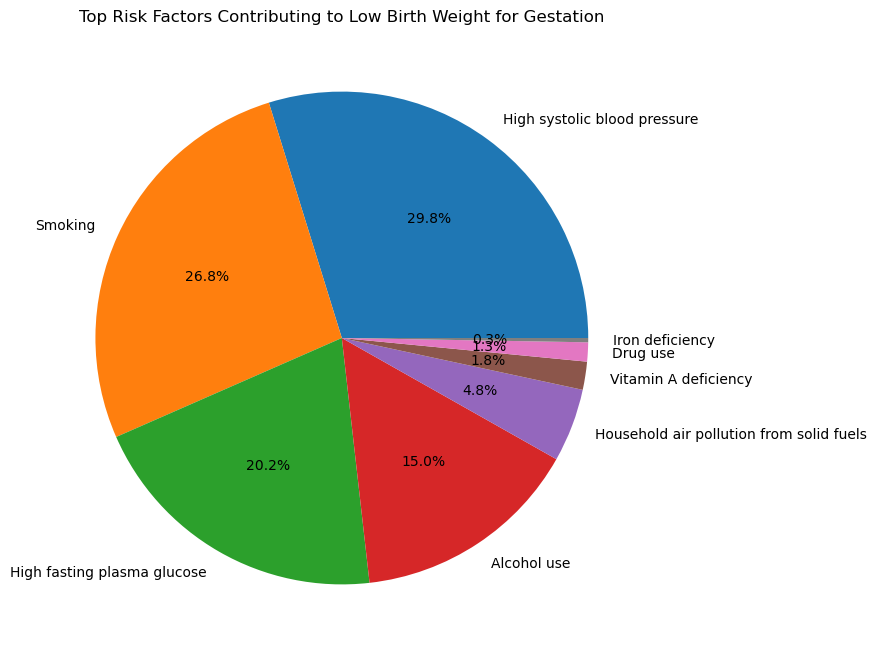

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Select the variables for low birth rate risk factors
risk_factors = ['High systolic blood pressure', 'Household air pollution from solid fuels',
                'Alcohol use', 'Smoking', 'Drug use', 'High fasting plasma glucose',
                'Iron deficiency', 'Vitamin A deficiency']

# Calculate the total deaths attributed to each risk factor
risk_factors_deaths = new_df_deaths[risk_factors].sum()

# Sort the risk factors by the number of deaths in descending order
top_risk_factors = risk_factors_deaths.sort_values(ascending=False)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_risk_factors, labels=top_risk_factors.index, autopct='%1.1f%%')
plt.title('Top Risk Factors Contributing to Low Birth Weight for Gestation')
plt.show()


## Visualization 4:  Relationship between Low Birth and Life Expectancy

The two scatterplots above show the relation between Low Birth Weight and Life Expectancy. By looking at the two plots, it appears that low Birth Weight has a greater impact on life expectancy in developing countries than in developed countries. After calculating the correlation coefficient for both plots, this is proven.

In [ ]:
df = pd.read_csv('number-of-deaths-by-risk-factor.csv')
df = df.groupby('Entity').mean()

df_life = pd.read_csv('Life Expectancy Data.csv')
df_life = df_life.groupby('Country').mean()

#create scatterplot for developing countries
df_developing = df.loc[['Haiti', 'Sierra Leone', 'Malawi']]
df_life_developing = df_life.loc[['Haiti', 'Sierra Leone', 'Malawi']]['Life expectancy ']

df_developing['Life expectancy'] = df_life_developing
df_developing['countries'] = ['Haiti', 'Sierra Leone', 'Malawi']

fig = px.scatter(df_developing, x='Low birth weight for gestation', y='Life expectancy', color='countries', 
                 title='Relationship (for developing countries) between Low Birth Weight and Life Expectancy')
fig.show()

#create scatterplot for developed countries
df_developed = df.loc[['Belgium', 'Finland', 'France']]
df_life_developed = df_life.loc[['Belgium', 'Finland', 'France']]['Life expectancy ']

df_developed['Life expectancy'] = df_life_developed
df_developed['countries'] = ['Belgium', 'Finland', 'France']

fig = px.scatter(df_developed, x='Low birth weight for gestation', y='Life expectancy', color='countries', 
                 title='Relationship (for developed countries) between Low Birth Weight and Life Expectancy')
fig.show()

In [ ]:
#calculate correlation coefficient for developing countries
correlation_developing = df_developing['Low birth weight for gestation'].corr(df_developing['Life expectancy'])
print('The correlation coefficient for developing countries is:', correlation_developing.round(2))

#calculate correlation coefficient for developed countries
correlation_developed = df_developed['Low birth weight for gestation'].corr(df_developed['Life expectancy'])
print('The correlation coefficient for developed countries is:', correlation_developed.round(2))

*It seems the code for visualization 4 doesn't always work when loading the document on github. If this is the case, the result of the code (in jupyter notebook) can be viewed on the screenshots below.

<img src="afb1.jpeg">

<img src="afb2.jpeg">